## Open-source Python package to perform Visual Impact Assessment (VIA) of onshore wind turbines
Chinna Subbaraya Siddharth (<b>Sid</b>) Ramavajjala (<a href="ramavajjala@wisc.edu">ramavajjala@wisc.edu</a>), Department of Geography, University of Wisconsin - Madison<br>
- Python library <code>viawind</code> is developed towards completion of Geog 778: Practicum in GIS Development. The main module (class) <code>CalcVisualImpact</code> has to be imported to work with calculation of VIA.

<h4>Alpha installation steps for developers</h4>
- Step 1: <code>git clone https://github.com/Sidrcs/Visual_Impact_Assessment.git</code><br>
- Step 2: <code>cd directory_path</code><br>
- Step 3: <code>conda create -n via python=3.9</code><br>
- Step 4: <code>conda activate via</code><br>
- Step 5: <code>conda install -c conda-forge gdal</code><br>
- Step 6: <code>pip install -e .</code><br>

In [9]:
# Import key method from viawind library
from viawind import CalcVisualImpact

### Download sample datasets from the below links:
- Wind Turbine CSV file: <a href = "https://uwmadison.box.com/s/81fy8tjcxsljx4vdwrar89d282mu4oc4">click to download</a>
- Digital Elevation Model (DEM) file: <a href = "https://uwmadison.box.com/s/zt6hew6382p2lyowgponf877e7g69tvo">click to download</a>

In [10]:
# Create a new instance of CalcVisualImpact module with Area of Interest (AoI) datasets
via = CalcVisualImpact(windturbine_fpath=r"G:/Package folder/tx_aoi.csv", 
                       dem_fpath=r"G:/demo_folder/datasets/USGS_13_n29w098_20211103.tif",
                      dir_path=r"G:/demo_folder/")

- Suggested to wind turbine data as in US Wind Turbine database: https://eerscmap.usgs.gov/uswtdb/data/
- Suggested to use a Digital Surface Model (DSM) instead of a Digital Elevation Model (DEM) for better results
- Try to use 1-arc second or 1/3-arc second DEM from https://apps.nationalmap.gov/downloader/


<img src = "https://github.com/Sidrcs/Visual_Impact_Assessment/blob/main/Graphics/GIS_Workflow.png?raw=true" width=800px height=800px>

In [ ]:
gdf = via.read_windturbine_file()

VIA GIS Pipeline is getting started....
Raster file size in MegaBytes (MB) is around 473.49
Approximate compute time to run pipeline: 1-2 hrs (might vary)
........................................................
blade viewsheds created for 42 points and outputs saved to G:\demo_folder\viewsheds_blade_end
hub viewsheds created for 42 points and outputs saved to G:\demo_folder\viewsheds_hub
sweep viewsheds created for 42 points and outputs saved to G:\demo_folder\viewsheds_rotor_sweep
........................................................
Reclassification completed and outputs saved to G:\demo_folder\viewsheds_blade_end
Reclassification completed and outputs saved to G:\demo_folder\viewsheds_hub
Reclassification completed and outputs saved to G:\demo_folder\viewsheds_rotor_sweep
........................................................
Performed raster merge for 126 rasters and outputs saved to G:\demo_folder\viewsheds_merged 
MultiRing Buffer rasters created for 42 points and outputs s

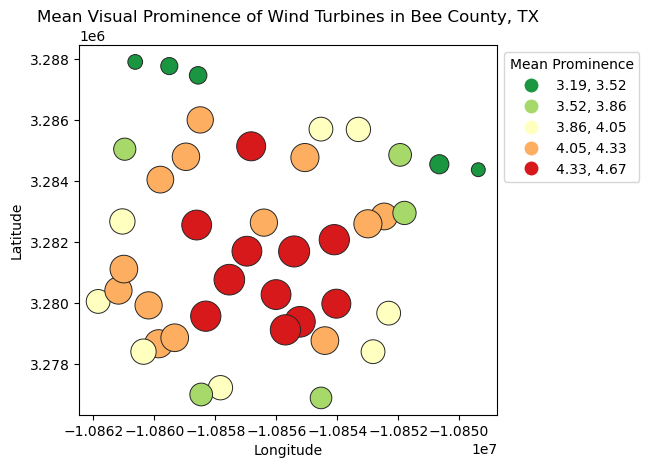

CPU times: total: 11min 31s
Wall time: 1h 1min


In [3]:
%%time
# Executes the complete GIS pipeline to calculate and visualize Mean Turbine Prominence for each wind turbine location.
via.run_via_pipeline(county_state_title="Bee County, TX")

Input one option from the following:
1 - square root(n)
2 - cube root(n)
3 - log(n+1)
Where n is number of turbines


Please enter a valid value: 2


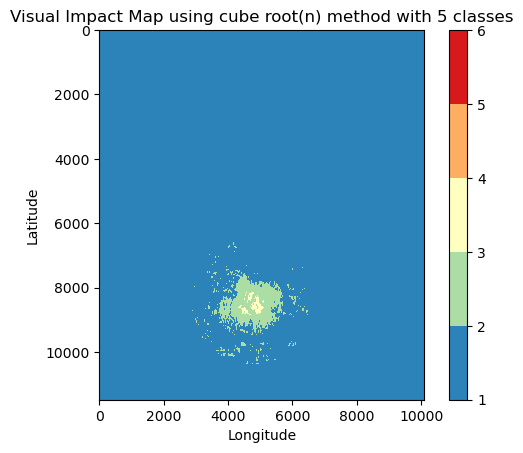

Saved visual impact map to the current directory


In [6]:
# Interactively performs visual impact calculation on the fly and visualizes the output raster
via.perform_visual_impact()

Please choose one viewshed to visualize
1 - Blade end viewshed
2 - Turbine hub viewshed
3 - Rotor sweep viewshed,
4 - merged viewshed


Input an option from above: 4
Input a turbine index between (1,42): 1


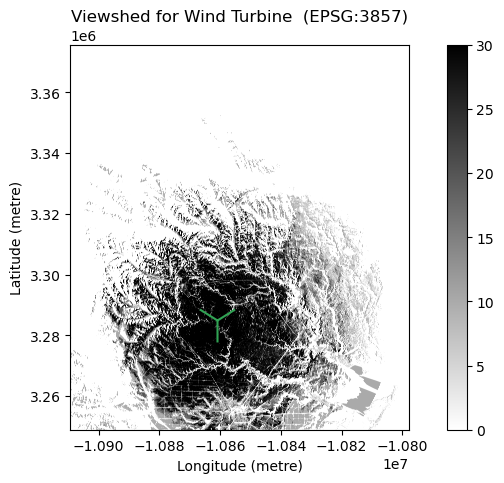

In [6]:
# Method to visualize a specific wind turbine location and it's associated relative viewshed raster
via.explore_turbine_viewshed()

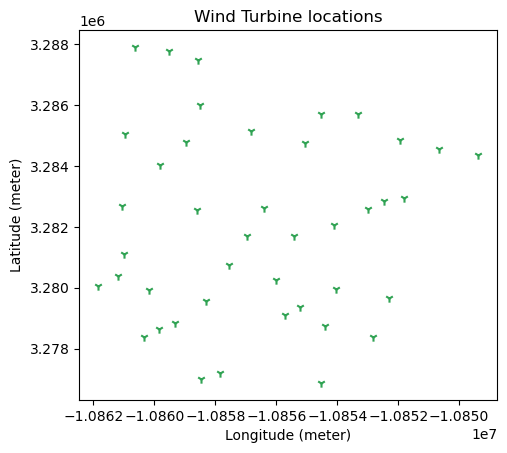

In [8]:
via.visualize_wind_turbines()

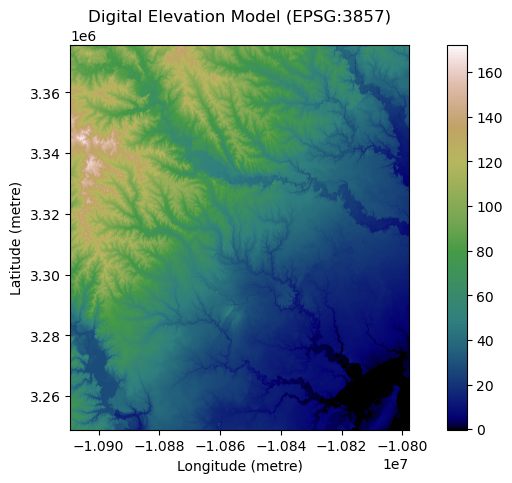

In [11]:
via.visualize_dem()